# Linear Regression

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### Create synthetic data

In [2]:
x = np.linspace(0,10, 50)
y = 2*x + 1 + np.random.randn(x.shape[0])/10

print(x.shape)
print(y.shape)

(50,)
(50,)


In [3]:
xt = torch.from_numpy(x)
yt = torch.from_numpy(y)

print(xt.shape)
print(yt.shape)

torch.Size([50])
torch.Size([50])


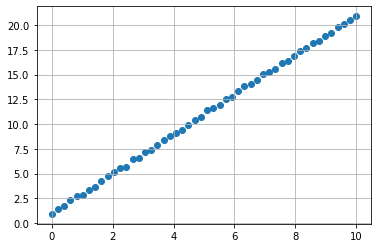

In [4]:
plt.scatter(x,y)
plt.grid()
plt.show()

### define weight and bias term

In [5]:
w = torch.ones(1, requires_grad=True) * 0.01
b = torch.ones(1, requires_grad=True) * 0.05

In [6]:
print(w)

tensor([0.0100], grad_fn=<MulBackward0>)


In [7]:
print(b)

tensor([0.0500], grad_fn=<MulBackward0>)


In [8]:
optim_steps = 100
lr = 0.001
loss_list = [0]*optim_steps

### apply optimization steps in loop

In [9]:
for i in range(optim_steps):
    y_hat = w*xt + b
    loss = ((yt - y_hat)**2).mean()
    
    # retain gradients of intermediate nodes
    w.retain_grad()
    b.retain_grad()

    # calculate gradients
    loss.backward(retain_graph=True)
    # store loss info
    loss_list[i] = loss.item()
    # apply updates
    w = w - lr*w.grad
    b = b - lr*b.grad

    

In [10]:
print(w)

tensor([2.0871], grad_fn=<SubBackward0>)


In [11]:
print(b)

tensor([0.3918], grad_fn=<SubBackward0>)


In [12]:
y_pred = w.detach().item()*x + b.detach().item()

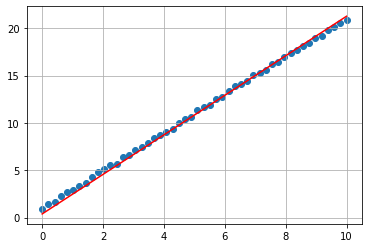

In [13]:
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.grid()
plt.show()

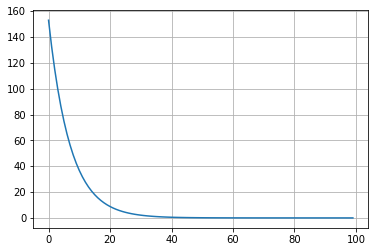

In [14]:
# plot loss
plt.plot(loss_list)
plt.grid()
plt.show()

1.5490627866792883